In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [2]:
# Read the data set into a pandas DataFrame
df = pd.read_excel('Churn.xlsx')
# Display the first few rows of the DataFrame to verify the data has been loaded correctly
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [3]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [4]:
# Convert "day.charge" and "eve.mins" columns to float64
df["day.charge"] = df["day.charge"].astype(float)
df["eve.mins"] = df["eve.mins"].astype(float)

In [5]:
# Print the updated data types of the columns
print(df[["day.charge", "eve.mins"]].dtypes)

day.charge    float64
eve.mins      float64
dtype: object


In [6]:
# check unique values of each column
# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical (object) data type
    if df[column].dtype == 'object':
        # Get the unique values in the column
        unique_values = df[column].unique()

        # Print the column name and its unique values
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()

Unique values in column 'state':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique values in column 'area.code':
['area_code_415' 'area_code_408' 'area_code_510']

Unique values in column 'voice.plan':
['yes' 'no']

Unique values in column 'intl.plan':
['no' 'yes']

Unique values in column 'churn':
['no' 'yes']



In [7]:
# Remove the "area_code_" prefix from "area.code" column
df["area.code"] = df["area.code"].str.replace("area_code_", "")

In [8]:
df["area.code"]

0       415
1       415
2       415
3       408
4       415
       ... 
4995    408
4996    415
4997    415
4998    510
4999    415
Name: area.code, Length: 5000, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [10]:
df.isnull().sum()

Unnamed: 0         0
state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,account.length,voice.messages,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
count,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000
mean,2508.523244,100.206681,7.754880,10.264198,4.433085,2.771851,180.306178,100.021936,30.652604,200.617368,100.174884,17.052695,200.434675,99.954518,9.019670,1.571946
std,1439.760538,39.695476,13.545738,2.761996,2.459495,0.745672,53.931206,19.835965,9.168275,50.550590,19.833572,4.296784,50.528158,19.959015,2.273776,1.307458
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1265.000000,73.000000,0.000000,8.500000,3.000000,2.300000,143.700000,87.000000,24.430000,166.400000,87.000000,14.140000,167.100000,87.000000,7.520000,1.000000
50%,2512.000000,100.000000,0.000000,10.300000,4.000000,2.780000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,1.000000
75%,3754.000000,127.000000,17.000000,12.000000,6.000000,3.240000,216.200000,113.000000,36.750000,234.100000,113.000000,19.900000,234.700000,113.000000,10.560000,2.000000
max,5000.000000,243.000000,52.000000,20.000000,20.000000,5.400000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,9.000000


In [16]:
#All continous variables in cname
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = df.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('churn')
cat_names

['Unnamed: 0', 'account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge', 'night.mins', 'night.calls', 'night.charge', 'customer.calls']


['state', 'area.code', 'voice.plan', 'intl.plan']

In [17]:
# Distribution of churn
churn_counts = df['churn'].value_counts()
print(churn_counts)

no     4264
yes     705
Name: churn, dtype: int64


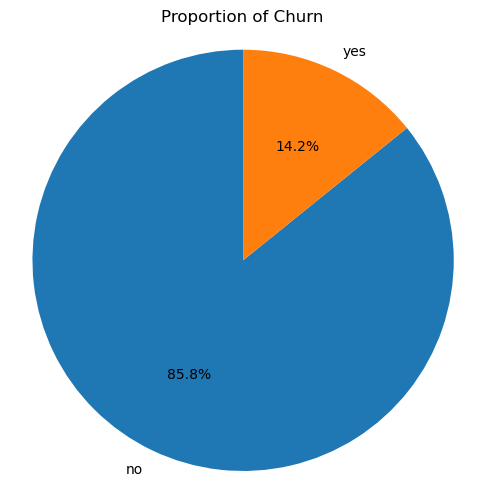

In [18]:
# Calculate the proportion of churned customers
churn_proportion = df['churn'].value_counts(normalize=True)

# Create a pie chart to display the proportion
labels = churn_proportion.index
sizes = churn_proportion.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

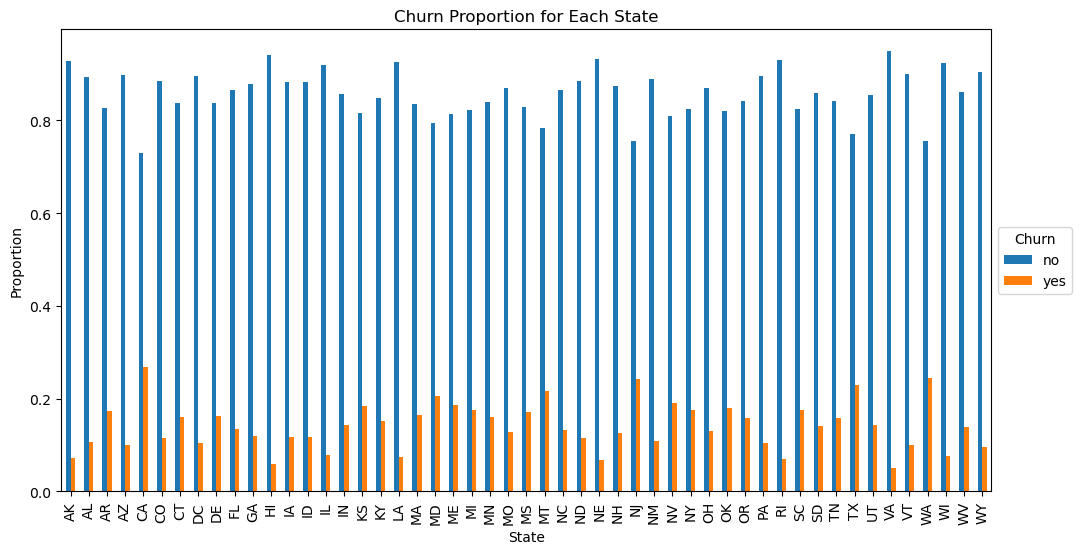

In [19]:
# Calculate the churn proportion for each state
state_churn_proportions = df.groupby('state')['churn'].value_counts(normalize=True).unstack()

# Plot a bar chart for each state (separate bars for "yes" and "no" churn)
ax = state_churn_proportions.plot(kind='bar', stacked=False, figsize=(12, 6))

# Set labels and title
plt.xlabel('State')
plt.ylabel('Proportion')
plt.title('Churn Proportion for Each State')

# Move the legend outside the plot
ax.legend(title='Churn', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the chart
plt.show()

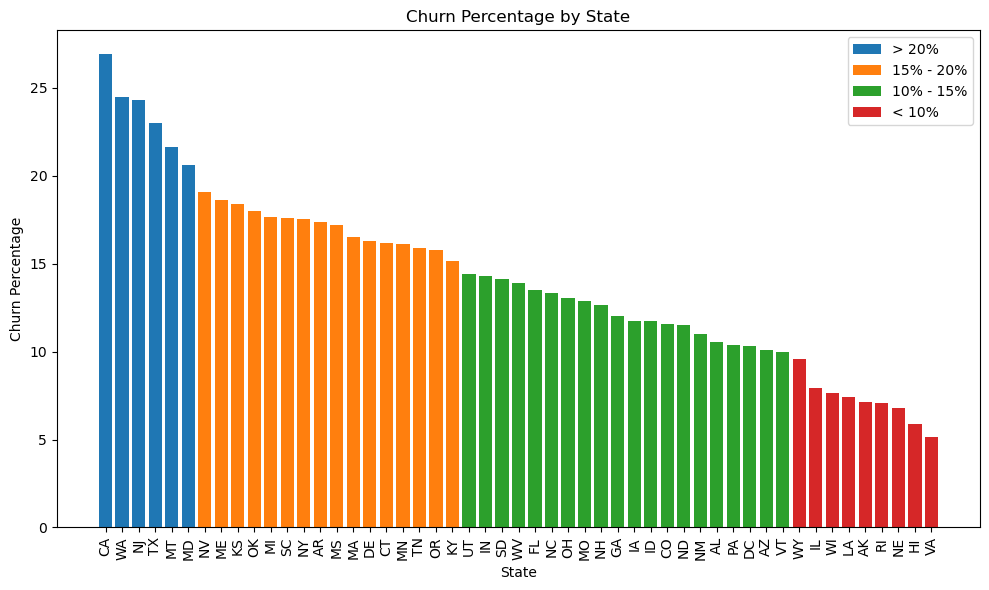

In [20]:
state_counts = df['state'].value_counts()

# Calculate the churn percentages for each state
state_churn_percentages = df[df['churn'] == 'yes']['state'].value_counts() / state_counts * 100

# Filter states based on different churn percentage ranges
states_more_than_20_percent = state_churn_percentages[state_churn_percentages > 20]
states_between_15_and_20_percent = state_churn_percentages[(state_churn_percentages >= 15) & (state_churn_percentages <= 20)]
states_between_10_and_15_percent = state_churn_percentages[(state_churn_percentages >= 10) & (state_churn_percentages < 15)]
states_less_than_10_percent = state_churn_percentages[state_churn_percentages < 10]

# Sort the states based on churn percentage in descending order
states_more_than_20_percent = states_more_than_20_percent.sort_values(ascending=False)
states_between_15_and_20_percent = states_between_15_and_20_percent.sort_values(ascending=False)
states_between_10_and_15_percent = states_between_10_and_15_percent.sort_values(ascending=False)
states_less_than_10_percent = states_less_than_10_percent.sort_values(ascending=False)

# Create a bar chart to visualize the states based on churn percentage ranges
plt.figure(figsize=(10, 6))
plt.bar(states_more_than_20_percent.index, states_more_than_20_percent.values, label='> 20%')
plt.bar(states_between_15_and_20_percent.index, states_between_15_and_20_percent.values, label='15% - 20%')
plt.bar(states_between_10_and_15_percent.index, states_between_10_and_15_percent.values, label='10% - 15%')
plt.bar(states_less_than_10_percent.index, states_less_than_10_percent.values, label='< 10%')

plt.xlabel('State')
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

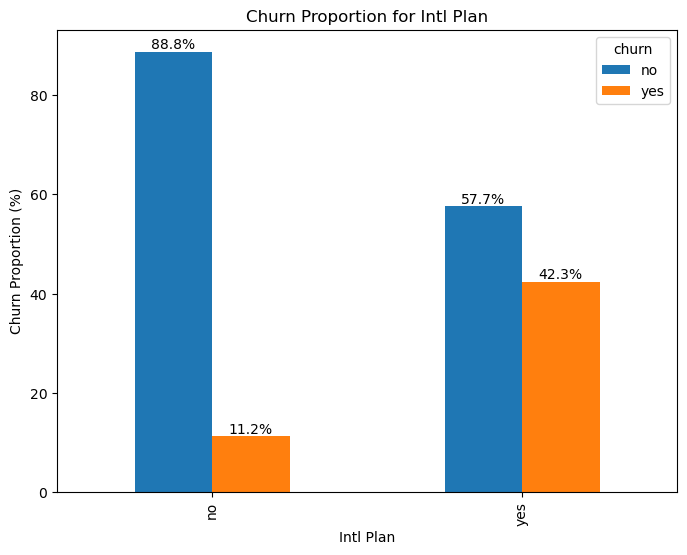

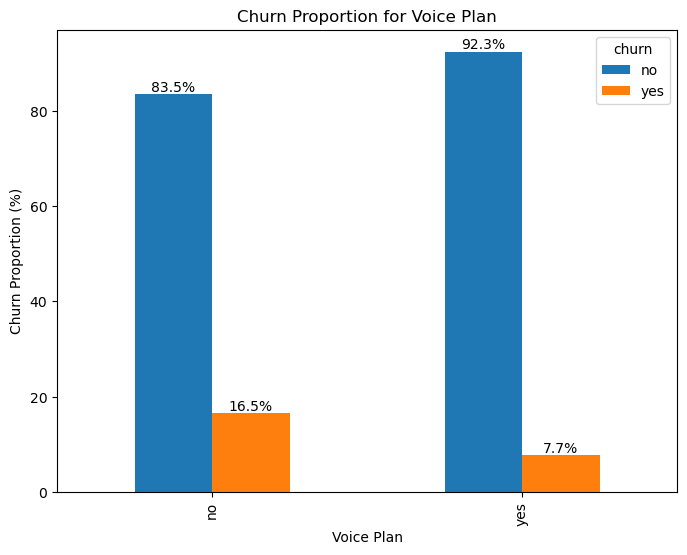

In [21]:
# with columns including 'intl.plan', 'voice.plan', and 'churn'

# Calculate the churn proportion for 'intl.plan'
intl_plan_churn_proportions = (df.groupby('intl.plan')['churn'].value_counts(normalize=True) * 100).unstack()

# Plot a bar chart for 'intl.plan' and churn
ax1 = intl_plan_churn_proportions.plot(kind='bar', stacked=False, figsize=(8, 6))

# Set labels and title for 'intl.plan' and churn chart
plt.xlabel('Intl Plan')
plt.ylabel('Churn Proportion (%)')
plt.title('Churn Proportion for Intl Plan')

# Add values on top of each bar
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(), 1)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Calculate the churn proportion for 'voice.plan'
voice_plan_churn_proportions = (df.groupby('voice.plan')['churn'].value_counts(normalize=True) * 100).unstack()

# Plot a bar chart for 'voice.plan' and churn
ax2 = voice_plan_churn_proportions.plot(kind='bar', stacked=False, figsize=(8, 6))

# Set labels and title for 'voice.plan' and churn chart
plt.xlabel('Voice Plan')
plt.ylabel('Churn Proportion (%)')
plt.title('Churn Proportion for Voice Plan')

# Add values on top of each bar
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(), 1)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Display the charts
plt.show()

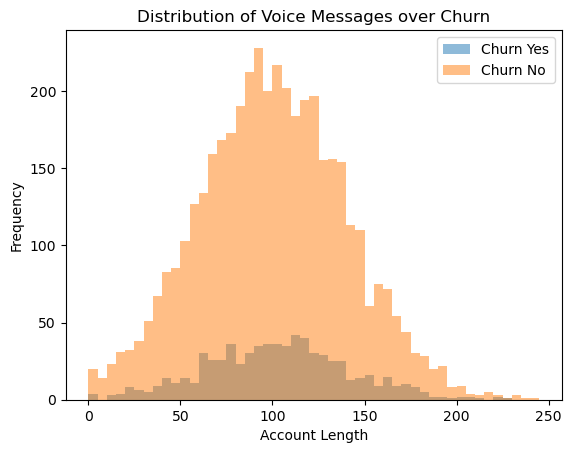

In [22]:
# with columns including 'account_length' and 'churn'

# Filter the data for churn 'yes' and 'no'
voice_message_churn_yes = df[df['churn'] == 'yes']['account.length']
voice_message_churn_no = df[df['churn'] == 'no']['account.length']

# Set the bin range for the histogram
bin_range = range(0, max(df['account.length']) + 5, 5)

# Plot the histogram for churn 'yes'
plt.hist(voice_message_churn_yes, bins=bin_range, alpha=0.5, label='Churn Yes')

# Plot the histogram for churn 'no'
plt.hist(voice_message_churn_no, bins=bin_range, alpha=0.5, label='Churn No')

# Set labels and title for the histogram
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Voice Messages over Churn')

# Add a legend
plt.legend()

# Display the histogram
plt.show()

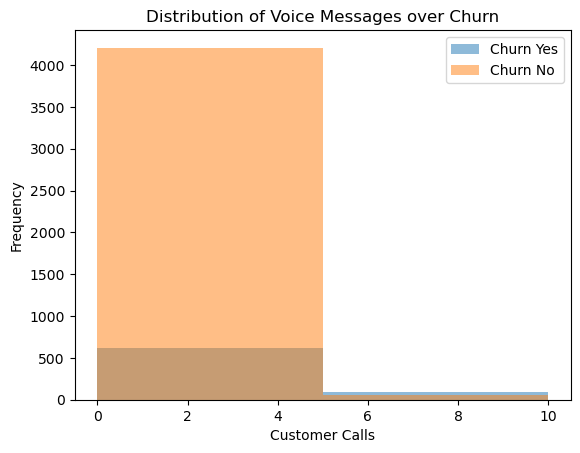

In [23]:
# with columns including 'voice.message' and 'churn'

# Filter the data for churn 'yes' and 'no'
voice_message_churn_yes = df[df['churn'] == 'yes']['customer.calls']
voice_message_churn_no = df[df['churn'] == 'no']['customer.calls']

# Set the bin range for the histogram
bin_range = range(0, max(df['customer.calls']) + 5, 5)

# Plot the histogram for churn 'yes'
plt.hist(voice_message_churn_yes, bins=bin_range, alpha=0.5, label='Churn Yes')

# Plot the histogram for churn 'no'
plt.hist(voice_message_churn_no, bins=bin_range, alpha=0.5, label='Churn No')

# Set labels and title for the histogram
plt.xlabel('Customer Calls')
plt.ylabel('Frequency')
plt.title('Distribution of Voice Messages over Churn')

# Add a legend
plt.legend()

# Display the histogram
plt.show()

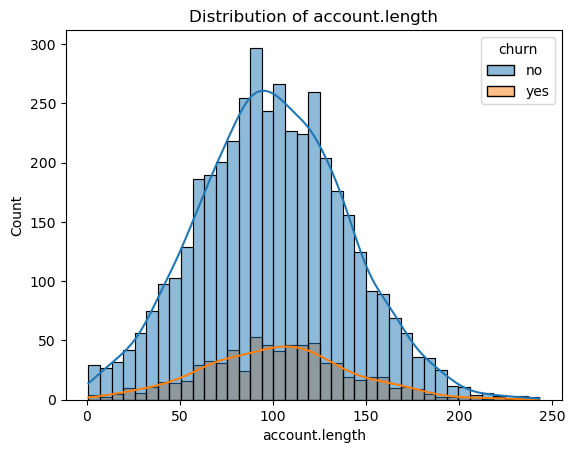

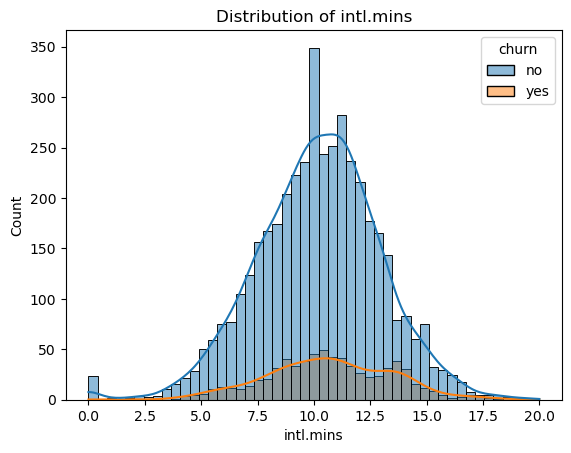

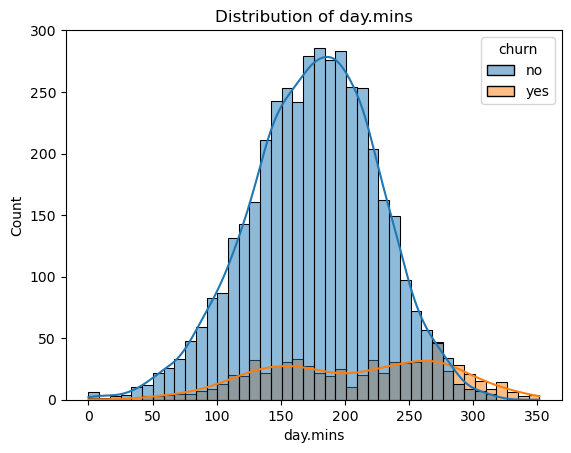

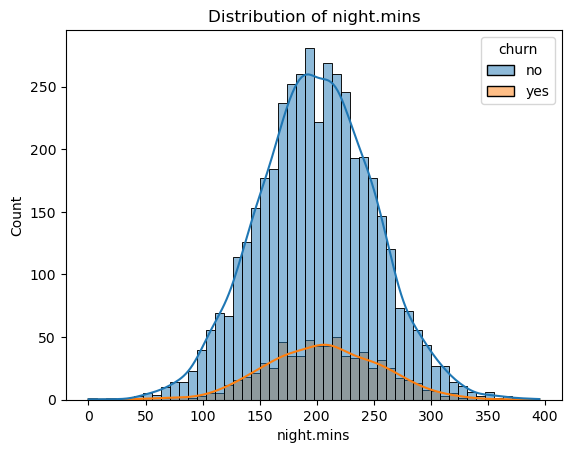

In [24]:
# Distribution of Numeric Features
numeric_features = ["account.length", "intl.mins", "day.mins", "night.mins"]
for feature in numeric_features:
    sns.histplot(data=df, x=feature, hue="churn", kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

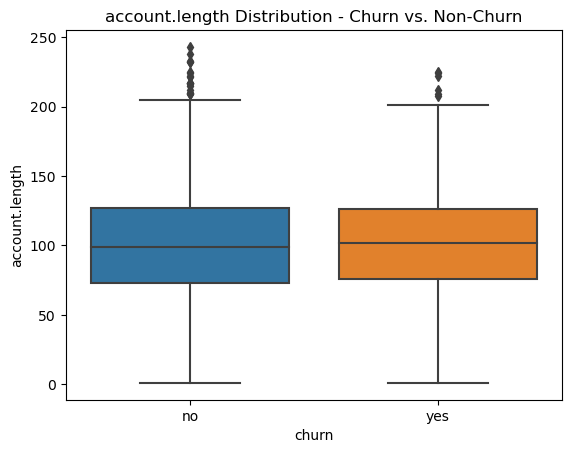

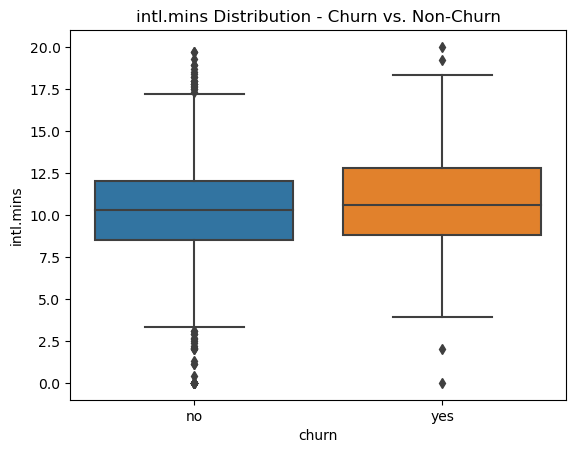

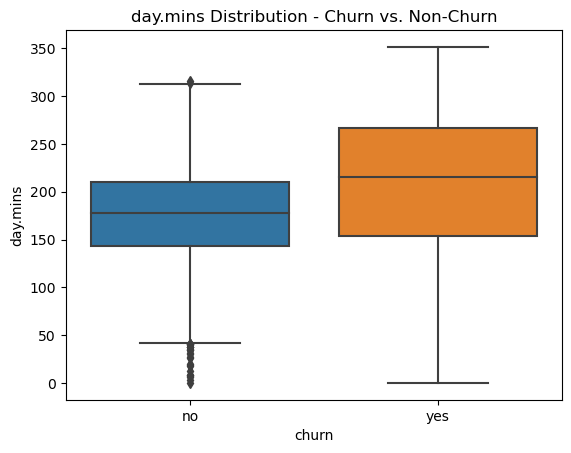

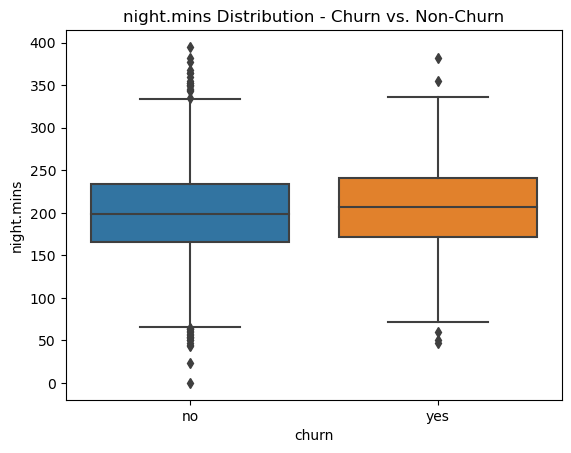

In [25]:
# Boxplots
numeric_features = ["account.length", "intl.mins", "day.mins", "night.mins"]
for feature in numeric_features:
    sns.boxplot(data=df, x="churn", y=feature)
    plt.title(f"{feature} Distribution - Churn vs. Non-Churn")
    plt.show()

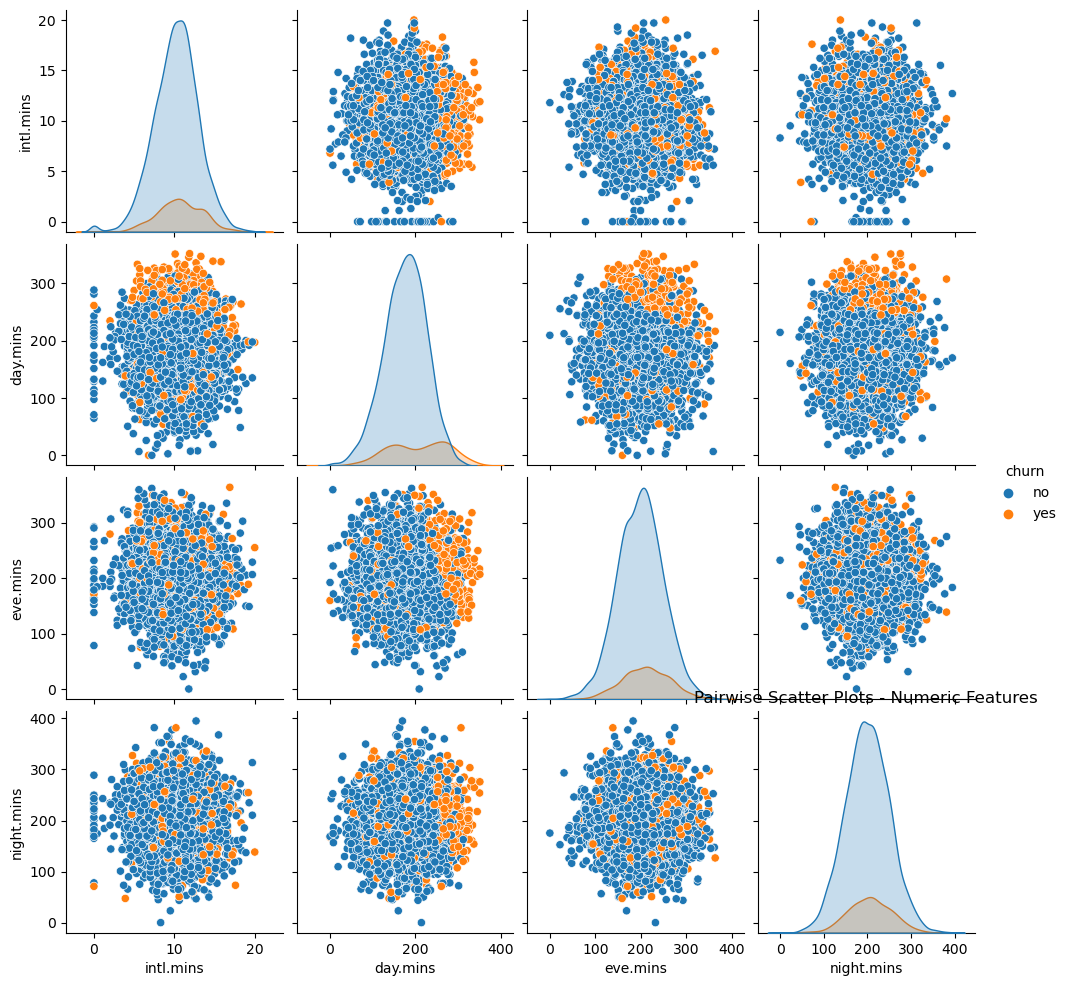

In [27]:
# Pairwise Scatter Plots
numeric_features = ["intl.mins", "day.mins", "eve.mins", "night.mins"]
sns.pairplot(data=df, vars=numeric_features, hue="churn")
plt.title("Pairwise Scatter Plots - Numeric Features")
plt.show()

In [28]:
#To convert categorical values to 1s and 0s in specific columns like "voice.plan", "churn", and "intl.plan"

# Create a copy of the DataFrame
df_temp = df.copy()

# Define the mapping dictionaries
mapping_dict = {'yes': 1, 'no': 0}

# Convert 'voice.plan' column in the temporary DataFrame
df_temp['voice.plan'] = df_temp['voice.plan'].map(mapping_dict)

# Convert 'churn' column in the temporary DataFrame
df_temp['churn'] = df_temp['churn'].map(mapping_dict)

# Convert 'intl.plan' column in the temporary DataFrame
df_temp['intl.plan'] = df_temp['intl.plan'].map(mapping_dict)

In [29]:
# Display the updated temporary DataFrame
df_temp.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,415,128,1,25,0,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,0
1,2,OH,415,107,1,26,0,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,0
2,3,NJ,415,137,0,0,0,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,0
3,4,OH,408,84,0,0,1,6.6,7,1.78,...,71,50.90,61.9,88,5.26,196.9,89,8.86,2,0
4,5,OK,415,75,0,0,1,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,0


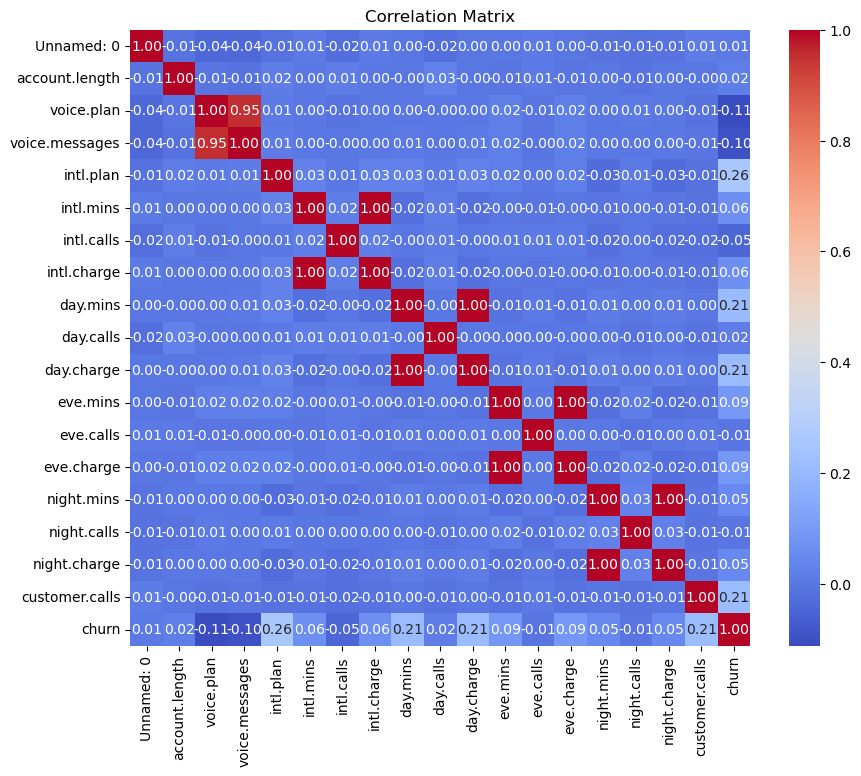

Unnamed: 0        0.006566
account.length    0.021307
voice.plan       -0.111879
voice.messages   -0.098588
intl.plan         0.260779
intl.mins         0.062034
intl.calls       -0.046513
intl.charge       0.062028
day.mins          0.207961
day.calls         0.016067
day.charge        0.207956
eve.mins          0.089104
eve.calls        -0.005534
eve.charge        0.089097
night.mins        0.045488
night.calls      -0.006732
night.charge      0.045484
customer.calls    0.213432
churn             1.000000
Name: churn, dtype: float64


In [30]:
# Calculate correlation matrix
correlation_matrix = df_temp.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['churn'])

- Account Length: The "account.length" column has a very weak positive correlation (0.02) with churn. This suggests that there is little to no linear relationship between the length of the account and the likelihood of churn.
- Voice Plan: The "voice.plan" column has a moderately negative correlation (-0.11) with churn. This indicates that customers with a voice plan are slightly less likely to churn compared to those without a voice plan.
- Voice Messages: The "voice.messages" column has a moderately negative correlation (-0.10) with churn. This implies that a higher number of voicemail messages is associated with a slightly lower likelihood of churn.
- International Plan: The "intl.plan" column has a moderate positive correlation (0.26) with churn. This suggests that customers with an international plan are more likely to churn compared to those without an international plan.
- Customer Calls: The "customer.calls" column has a moderate positive correlation (0.21) with churn. This indicates that a higher number of calls to customer service is associated with a higher likelihood of churn.
- Other Columns: The remaining columns (e.g., "intl.mins", "day.mins", "eve.mins", etc.) show weak correlations with churn, suggesting that they have little to no linear relationship with the likelihood of churn.

In [31]:
#state vs churn using cramer's v test

# Create a contingency table between 'state' and 'churn'
contingency_table = pd.crosstab(df['state'], df['churn'])

# Calculate the chi-square statistic, p-value, and degrees of freedom
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V statistic
n = contingency_table.sum().sum()  # Total number of observations
phi_c = np.sqrt(chi2 / n)  # Phi coefficient
r, k = contingency_table.shape  # Number of rows and columns in contingency table
cramer_v = phi_c / np.sqrt(min(r - 1, k - 1))  # Cramer's V statistic

print("Cramer's V statistic:", cramer_v)
print("p-value:", p)

Cramer's V statistic: 0.13969285502652723
p-value: 7.715636960167986e-05


In [32]:
# Calculate mutual information score between 'area.code' and 'churn'
mi_score = mutual_info_score(df['area.code'], df['churn'])

print("Mutual Information Score:", mi_score)

Mutual Information Score: 6.135888655503519e-05


In [33]:
# Finding relationship btw state,area code vs churn

# Cross-tabulate "state" and "churn"
state_churn_cross_tab = pd.crosstab(df['state'], df['churn'])

# Perform chi-square test for "state" and "churn"
chi2, p, dof, expected = chi2_contingency(state_churn_cross_tab)

# Print the chi-square test results
print("Chi-square test results for 'state' and 'churn':")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Cross-tabulate "area code" and "churn"
area_code_churn_cross_tab = pd.crosstab(df['area.code'], df['churn'])

# Perform chi-square test for "area code" and "churn"
chi2, p, dof, expected = chi2_contingency(area_code_churn_cross_tab)

# Print the chi-square test results
print("Chi-square test results for 'area code' and 'churn':")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square test results for 'state' and 'churn':
Chi-square statistic: 96.96553182120245
p-value: 7.715636960167986e-05
Degrees of freedom: 50
Chi-square test results for 'area code' and 'churn':
Chi-square statistic: 0.6136570438368769
p-value: 0.7357767596774193
Degrees of freedom: 2
Expected frequencies: [[1071.79231234  177.20768766]
 [2127.2803381   351.7196619 ]
 [1064.92734957  176.07265043]]


- Area Code vs Churn: In summary, based on the chi-square test results, there is no significant relationship between 'area code' and 'churn' in the given dataset.

- For State vs Churn: In summary, based on the chi-square test results, we can conclude that there is a significant relationship between 'state' and 'churn' in the given dataset. The 'state' variable appears to have an association with the likelihood of churn, suggesting that customers from different states may have different churn behavior.

In [34]:
df_temp['total_charge'] = df_temp['intl.charge'] + df_temp['day.charge'] + df_temp['eve.charge'] + df_temp['night.charge']
df_temp['total_calls'] = df_temp['intl.calls'] + df_temp['day.calls'] + df_temp['eve.calls'] + df_temp['night.charge']
df_temp['total_mins'] = df_temp['intl.mins'] + df_temp['day.mins'] + df_temp['eve.mins'] + df_temp['night.mins']

columns = ['total_charge', 'total_calls','total_mins','churn']
data_subset = df_temp[columns]

# Compute the correlation matrix
correlation_matrix = data_subset.corr(method='pearson', min_periods=1)

# Display the correlation matrix
print(correlation_matrix)

              total_charge  total_calls  total_mins     churn
total_charge      1.000000     0.023050    0.889551  0.235562
total_calls       0.023050     1.000000    0.049679  0.006992
total_mins        0.889551     0.049679    1.000000  0.204255
churn             0.235562     0.006992    0.204255  1.000000


In [35]:
df['total_charge'] = (df['intl.charge']+ df['day.charge'] + df['eve.charge']+ df['night.charge']).astype(int)
df['total_calls'] = (df['intl.calls'] + df['day.calls'] + df['eve.calls'] + df['night.charge']).astype(int)
df['total_mins'] = (df['intl.mins'] + df['day.mins'] + df['eve.mins'] + df['night.mins']).astype(int)

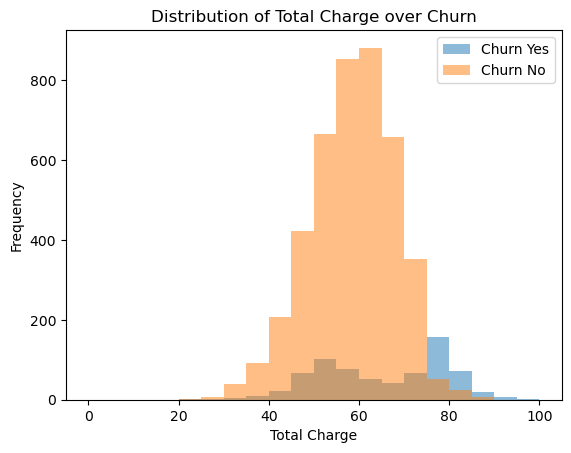

In [36]:
# with columns including 'total_charge' and 'churn'

# Filter the data for churn 'yes' and 'no'
total_charge_churn_yes = df[df['churn'] == 'yes']['total_charge']
total_charge_churn_no = df[df['churn'] == 'no']['total_charge']

# Set the bin range for the histogram
bin_range = range(0, max(df['total_charge']) + 5, 5)

# Plot the histogram for churn 'yes'
plt.hist(total_charge_churn_yes, bins=bin_range, alpha=0.5, label='Churn Yes')

# Plot the histogram for churn 'no'
plt.hist(total_charge_churn_no, bins=bin_range, alpha=0.5, label='Churn No')

# Set labels and title for the histogram
plt.xlabel('Total Charge')
plt.ylabel('Frequency')
plt.title('Distribution of Total Charge over Churn')

# Add a legend
plt.legend()

# Display the histogram
plt.show()

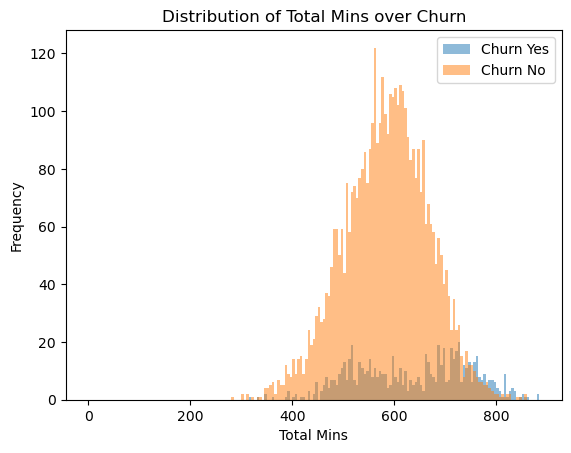

In [37]:
# with columns including 'total_mins' and 'churn'

# Filter the data for churn 'yes' and 'no'
total_mins_churn_yes = df[df['churn'] == 'yes']['total_mins']
total_mins_churn_no = df[df['churn'] == 'no']['total_mins']

# Set the bin range for the histogram
bin_range = range(0, max(df['total_mins']) + 5, 5)

# Plot the histogram for churn 'yes'
plt.hist(total_mins_churn_yes, bins=bin_range, alpha=0.5, label='Churn Yes')

# Plot the histogram for churn 'no'
plt.hist(total_mins_churn_no, bins=bin_range, alpha=0.5, label='Churn No')

# Set labels and title for the histogram
plt.xlabel('Total Mins')
plt.ylabel('Frequency')
plt.title('Distribution of Total Mins over Churn')

# Add a legend
plt.legend()

# Display the histogram
plt.show()

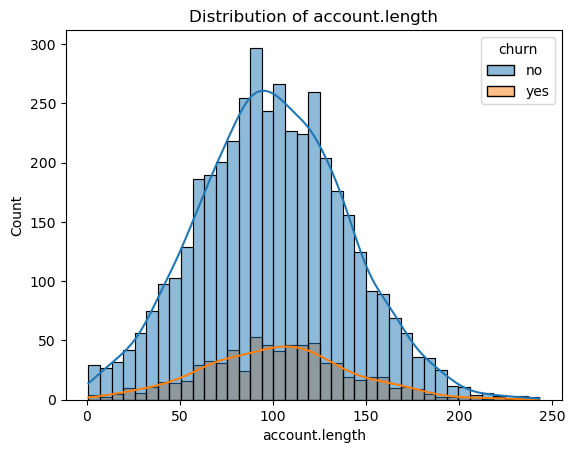

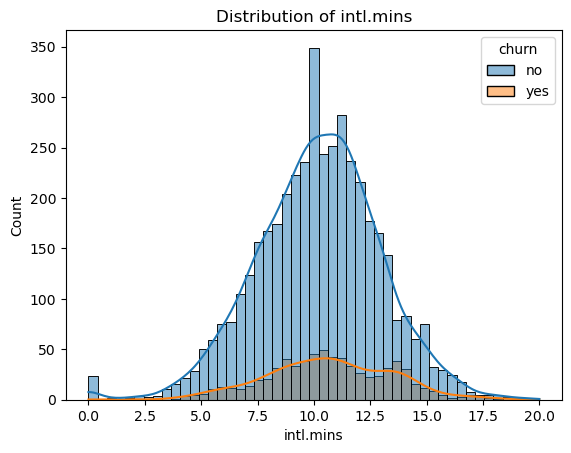

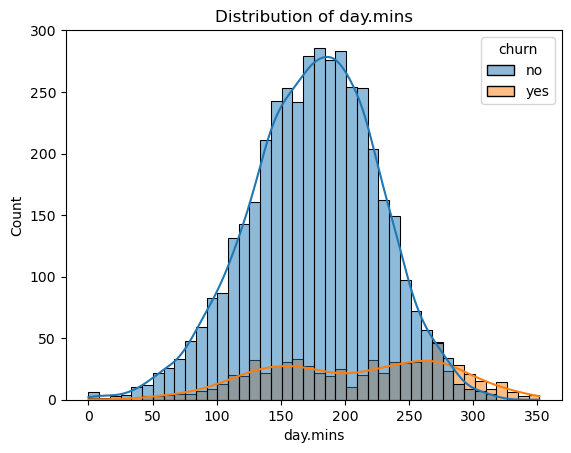

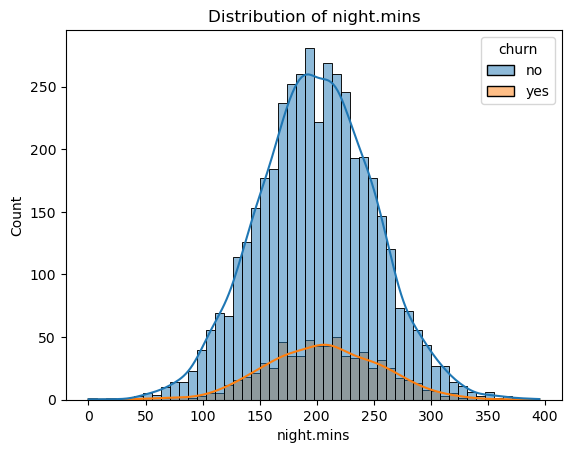

In [38]:
# Distribution of Numeric Features
numeric_features = ["account.length", "intl.mins", "day.mins", "night.mins"]
for feature in numeric_features:
    sns.histplot(data=df, x=feature, hue="churn", kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

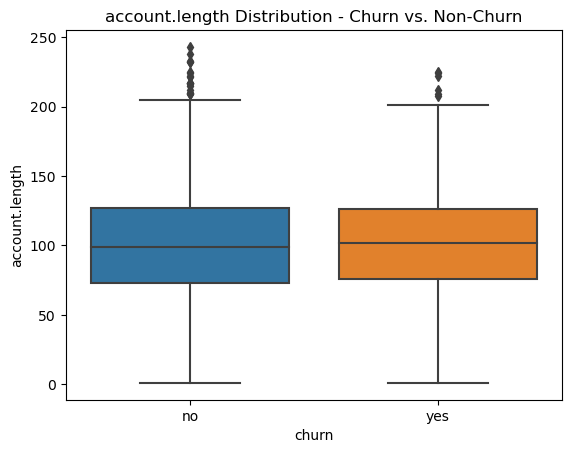

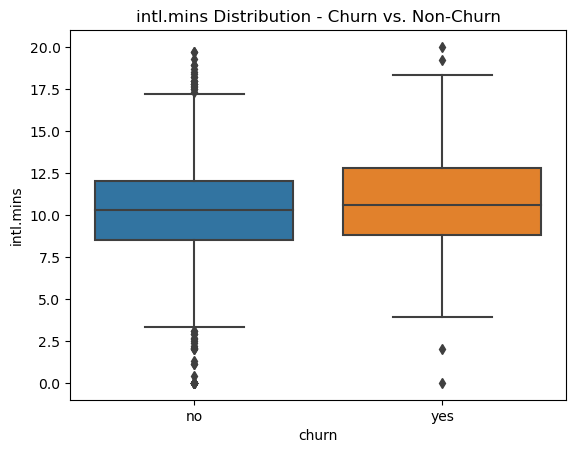

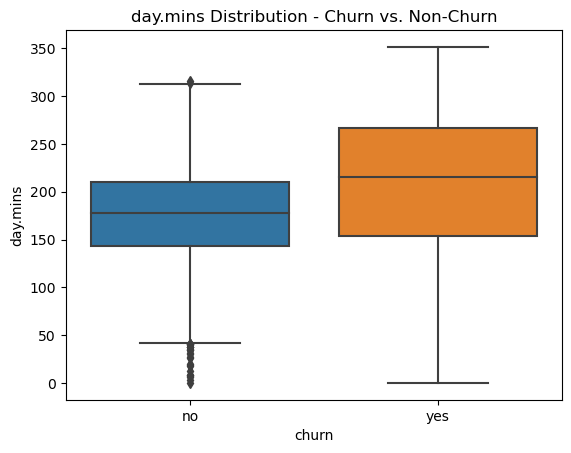

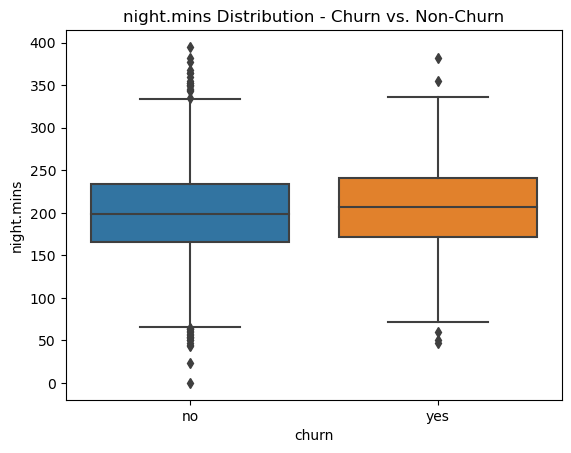

In [39]:
# Boxplots
numeric_features = ["account.length", "intl.mins", "day.mins", "night.mins"]
for feature in numeric_features:
    sns.boxplot(data=df, x="churn", y=feature)
    plt.title(f"{feature} Distribution - Churn vs. Non-Churn")
    plt.show()

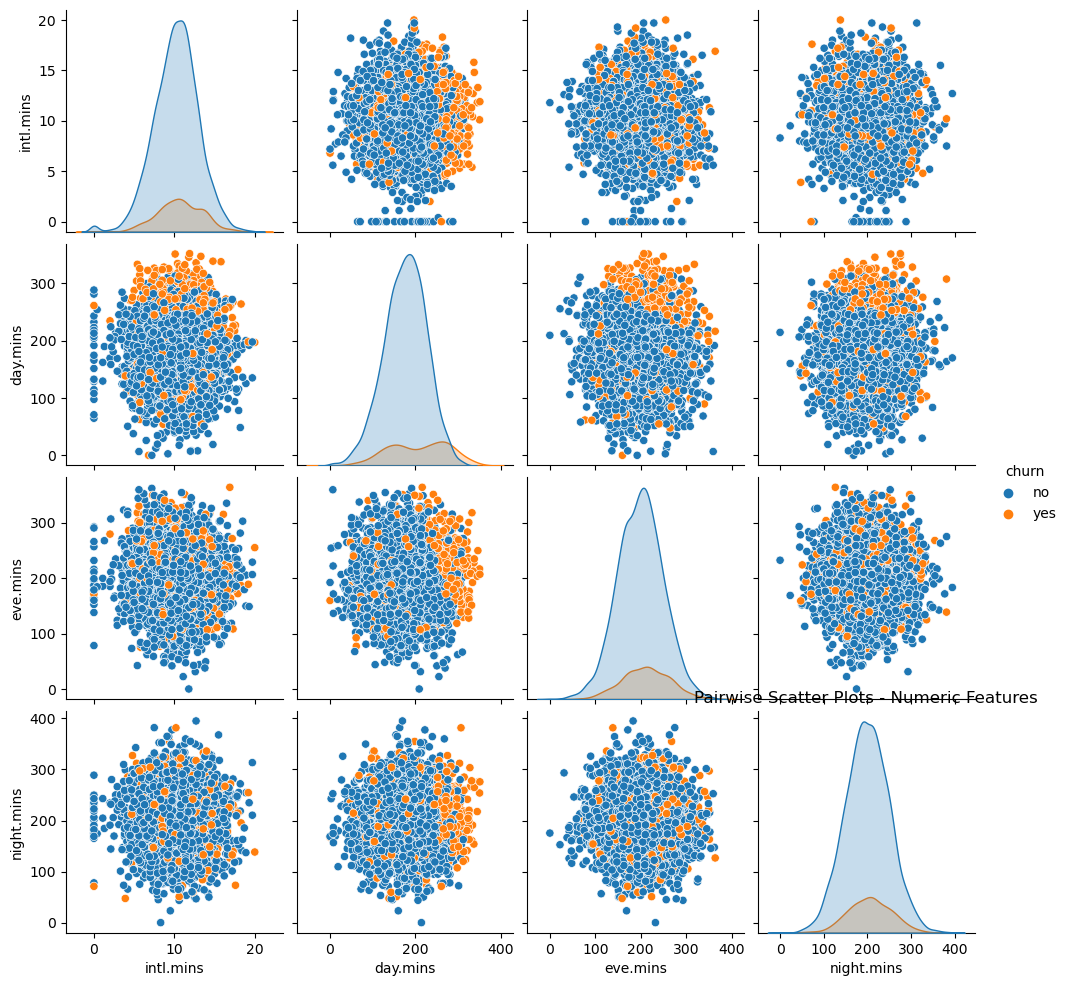

In [40]:
# Pairwise Scatter Plots
numeric_features = ["intl.mins", "day.mins", "eve.mins", "night.mins"]
sns.pairplot(data=df, vars=numeric_features, hue="churn")
plt.title("Pairwise Scatter Plots - Numeric Features")
plt.show()

In [41]:
# Define the mapping dictionaries
mapping_dict = {'yes': 1, 'no': 0}

# Convert 'voice.plan' column in the temporary DataFrame
df['voice.plan'] = df['voice.plan'].map(mapping_dict)

# Convert 'churn' column in the temporary DataFrame
df['churn'] = df['churn'].map(mapping_dict)

# Convert 'intl.plan' column in the temporary DataFrame
df['intl.plan'] = df['intl.plan'].map(mapping_dict)

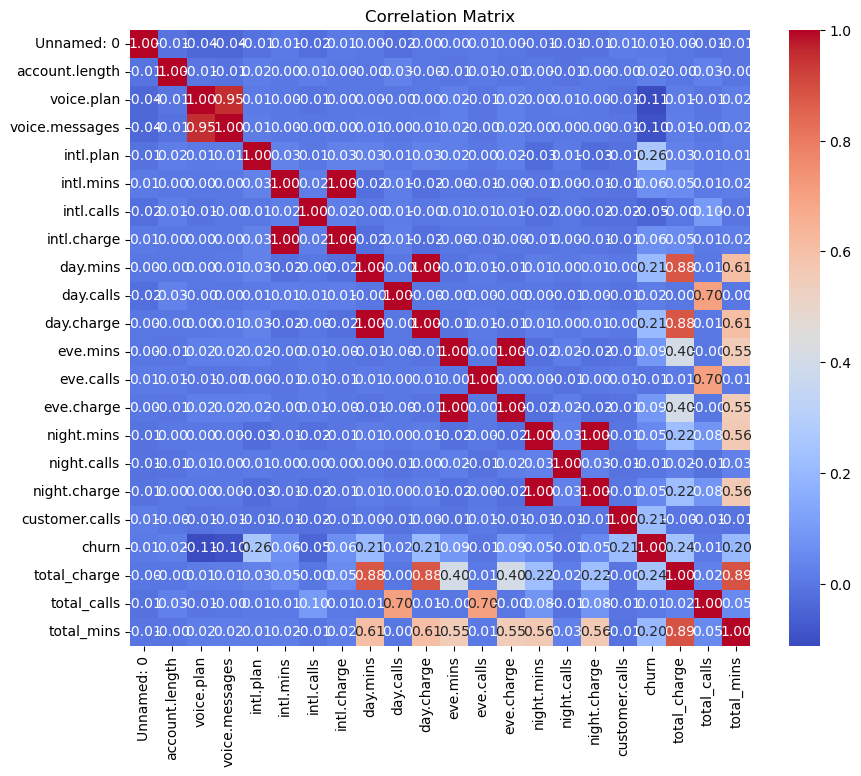

Unnamed: 0        0.006566
account.length    0.021307
voice.plan       -0.111879
voice.messages   -0.098588
intl.plan         0.260779
intl.mins         0.062034
intl.calls       -0.046513
intl.charge       0.062028
day.mins          0.207961
day.calls         0.016067
day.charge        0.207956
eve.mins          0.089104
eve.calls        -0.005534
eve.charge        0.089097
night.mins        0.045488
night.calls      -0.006732
night.charge      0.045484
customer.calls    0.213432
churn             1.000000
total_charge      0.235657
total_calls       0.006704
total_mins        0.204275
Name: churn, dtype: float64


In [42]:
# Calculate correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['churn'])

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(df, 0.85)
len(set(corr_features))

7

In [45]:
corr_features

{'day.charge',
 'eve.charge',
 'intl.charge',
 'night.charge',
 'total_charge',
 'total_mins',
 'voice.messages'}

In [46]:
df = df.drop(corr_features,axis=1)
df

,Unnamed: 0,state,area.code,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,1,KS,415,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,2,OH,415,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,3,NJ,415,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,4,OH,408,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,5,OK,415,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,408,50,1,0,9.9,5,235.7,127,223.0,126,297.5,116,2,0,271
4996,4997,WV,415,152,0,0,14.7,2,184.2,90,256.8,73,213.6,113,3,1,174
4997,4998,DC,415,61,0,0,13.6,4,140.6,89,172.8,128,212.4,97,1,0,230
4998,4999,DC,510,109,0,0,8.5,6,188.8,67,171.7,92,224.4,89,0,0,175


In [47]:
## From chi2 test we can conclude that there is no significant relation between 'area code' and 'churn' in the given dataset.
# so we will drop 'area.code' column also
df = df.drop('area.code', axis=1)

In [48]:
df 

,Unnamed: 0,state,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,1,KS,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,2,OH,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,3,NJ,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,4,OH,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,5,OK,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,50,1,0,9.9,5,235.7,127,223.0,126,297.5,116,2,0,271
4996,4997,WV,152,0,0,14.7,2,184.2,90,256.8,73,213.6,113,3,1,174
4997,4998,DC,61,0,0,13.6,4,140.6,89,172.8,128,212.4,97,1,0,230
4998,4999,DC,109,0,0,8.5,6,188.8,67,171.7,92,224.4,89,0,0,175


In [49]:
df = df.drop('state', axis=1)

In [50]:
df

,Unnamed: 0,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,1,128,1,0,10.0,3,265.1,110,197.4,99,244.7,91,1,0,223
1,2,107,1,0,13.7,3,161.6,123,195.5,103,254.4,103,1,0,240
2,3,137,0,0,12.2,5,243.4,114,121.2,110,162.6,104,0,0,236
3,4,84,0,1,6.6,7,299.4,71,61.9,88,196.9,89,2,0,174
4,5,75,0,1,10.1,3,166.7,113,148.3,122,186.9,121,3,0,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,50,1,0,9.9,5,235.7,127,223.0,126,297.5,116,2,0,271
4996,4997,152,0,0,14.7,2,184.2,90,256.8,73,213.6,113,3,1,174
4997,4998,61,0,0,13.6,4,140.6,89,172.8,128,212.4,97,1,0,230
4998,4999,109,0,0,8.5,6,188.8,67,171.7,92,224.4,89,0,0,175


In [51]:
#Updating values _after removal of var
cname = ['account.length', 'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls',
       'total_calls']

#All categorical var and removing target var
cat_names = ['voice.plan', 'intl.plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['account.length', 'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins', 'eve.calls', 'night.mins', 'night.calls', 'customer.calls', 'total_calls']

cat_name :- ['voice.plan', 'intl.plan']


## Feature Scaling

Feature scaling is necessary to bring all features to the same scale. If this is not done, then the attention of the algorithm will be attracted to features that include large values. 

In [52]:
### Checking Distribution of data

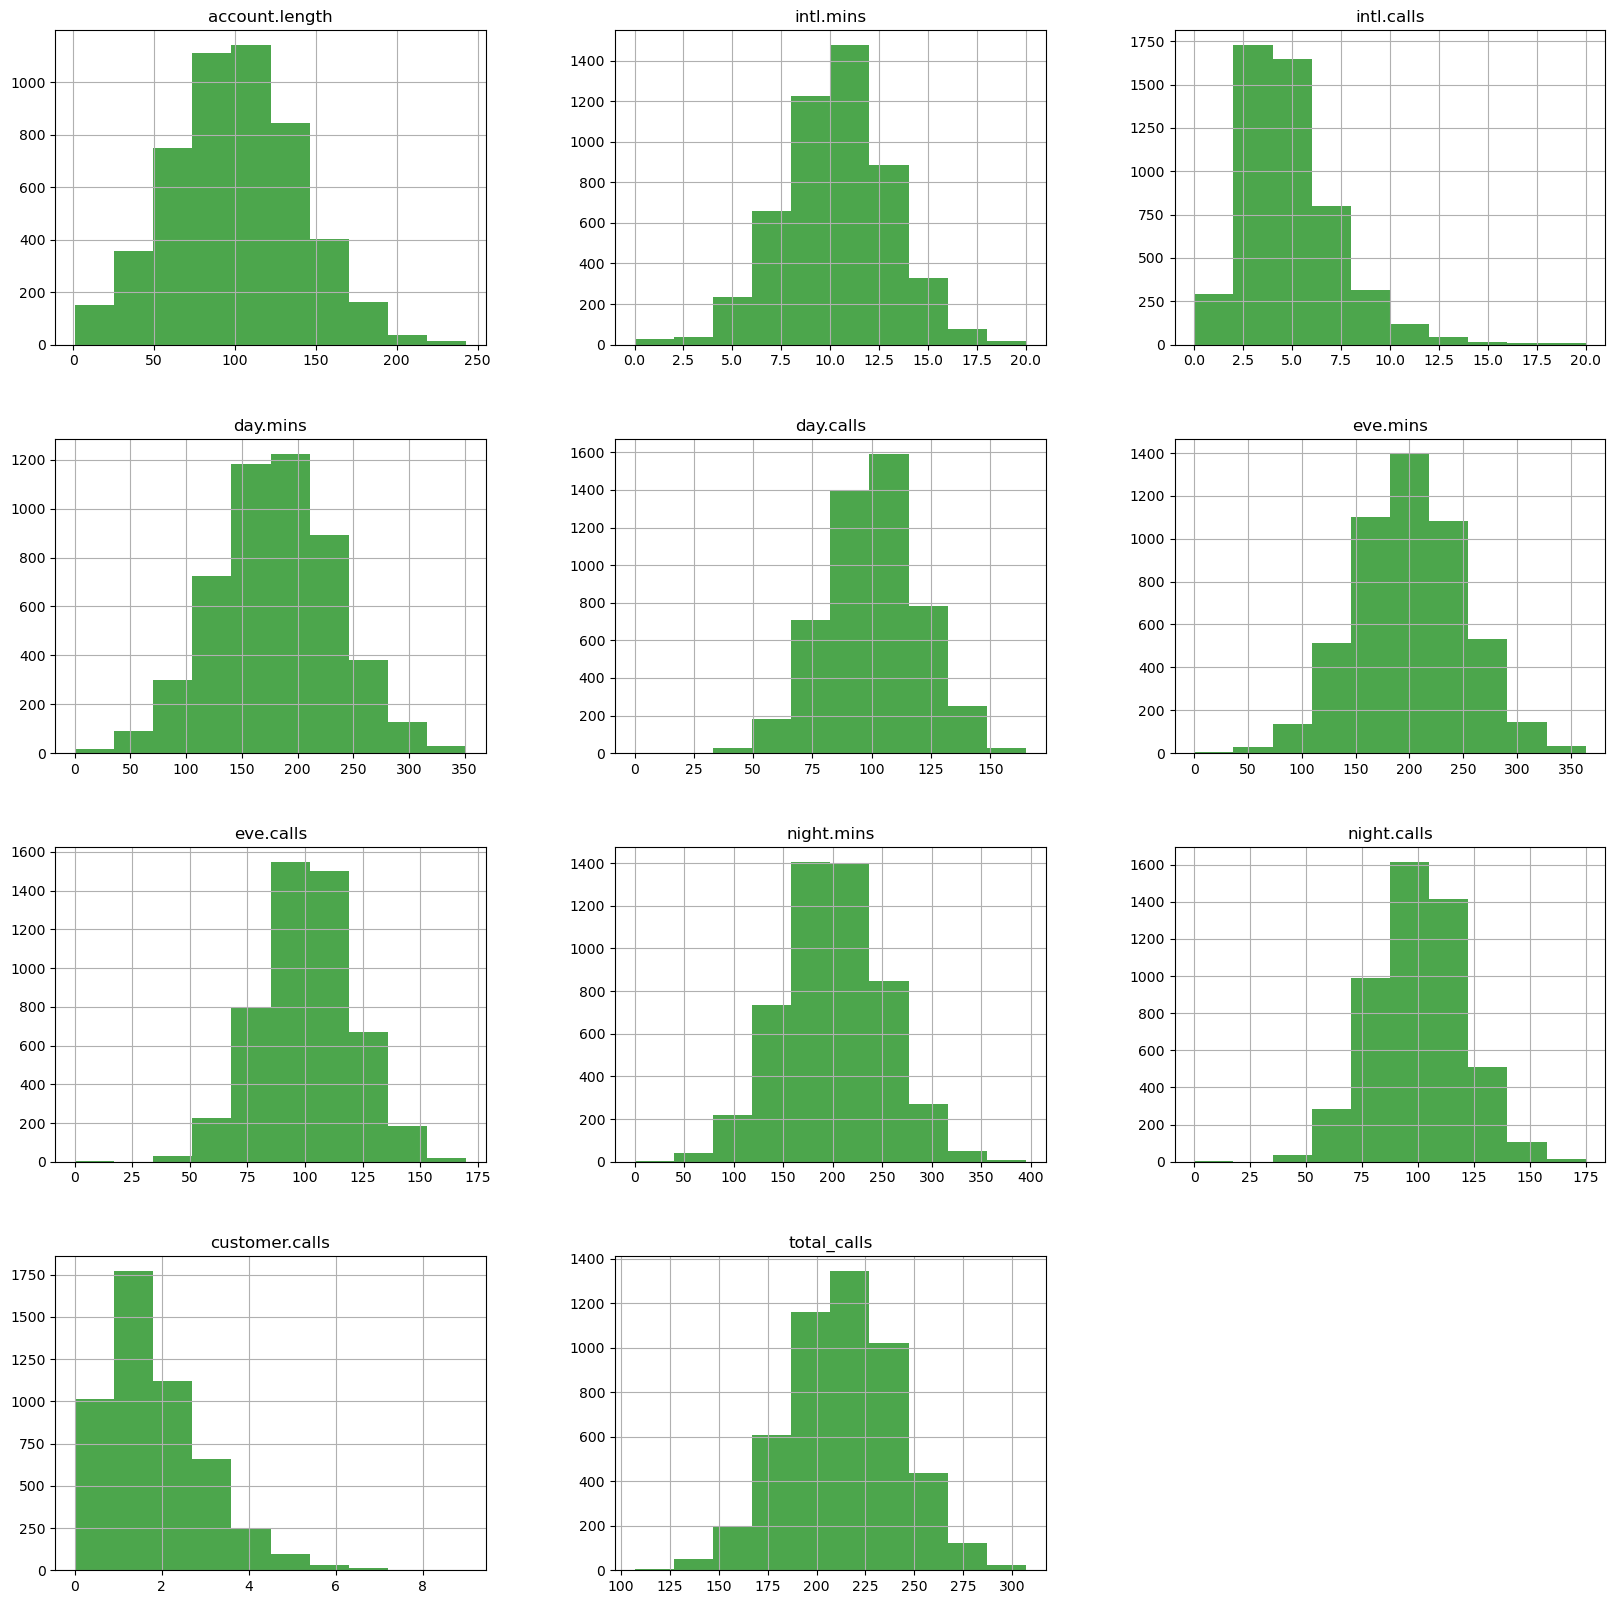

In [54]:
#Checking distribution of data via pandas visualization
df[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()

In [55]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [56]:
#Standardizing Scale
df = scale_standard(df)

In [57]:
df

,Unnamed: 0,account.length,voice.plan,intl.plan,intl.mins,intl.calls,day.mins,day.calls,eve.mins,eve.calls,night.mins,night.calls,customer.calls,churn,total_calls
0,1,0.700163,1,0,-0.095655,-0.582675,1.572259,0.503029,-0.063646,-0.059237,0.876053,-0.448645,-0.437449,0,0.347971
1,2,0.171136,1,0,1.243956,-0.582675,-0.346853,1.158404,-0.101233,0.142441,1.068025,0.152587,-0.437449,0,0.948464
2,3,0.926889,0,0,0.700871,0.230501,1.169895,0.704683,-1.571047,0.495378,-0.748784,0.202689,-1.202292,0,0.807172
3,4,-0.408275,0,1,-1.326648,1.043676,2.208254,-1.463097,-2.744130,-0.613852,-0.069955,-0.548851,0.327394,0,-1.382862
4,5,-0.635001,0,1,-0.059449,-0.582675,-0.252288,0.654269,-1.034951,1.100413,-0.267864,1.054435,1.092237,0,1.160403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,-1.264796,1,0,-0.131860,0.230501,1.027120,1.360058,0.442777,1.302091,1.921015,0.803922,0.327394,0,2.043481
4996,4997,1.304766,0,0,1.606013,-0.989262,0.072200,-0.505241,1.111414,-1.370146,0.260554,0.653614,1.092237,1,-1.382862
4997,4998,-0.987686,0,0,1.207750,-0.176087,-0.736238,-0.555654,-0.550288,1.402930,0.236805,-0.148029,-0.437449,0,0.595233
4998,4999,0.221519,0,0,-0.638740,0.637088,0.157494,-1.664751,-0.572048,-0.412174,0.474296,-0.548851,-1.202292,0,-1.347539


### Sampling Data For Train and Test

In [58]:
X = df[['account.length', 'voice.plan', 'intl.plan',
       'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls',
       'total_calls']]

In [59]:
y = df['churn']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
(X_train.shape),(y_train.shape)

((3975, 13), (3975,))